In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [60]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0           0.0              1          Yes   
1  51676  Female  61.0           0.0              0          Yes   
2  31112    Male  80.0           0.0              1          Yes   
3  60182  Female  49.0           0.0              0          Yes   
4   1665  Female  79.0           1.0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

# Data Exploration

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   float64
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5108 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 479.2+ KB


There are 5110 Row and 12 Column

The Dataframe contains about 3 Dtypes:
- **int64**
- **float64**
- **object** which will be turned later into **category**

In [62]:
round((df.isna().sum() / df.shape[0]) * 100, 2)

id                   0.00
gender               0.00
age                  0.02
hypertension         0.02
heart_disease        0.00
ever_married         0.00
work_type            0.04
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.02
stroke               0.00
dtype: float64

We can see that we have null values in the **age**, **hypertension**, **work_type**, **smoking_status** and **bmi** columns

In [63]:
df.duplicated().sum()

0


We have zero dublicates in the dataframe which is good

In [64]:
cat_features = df.select_dtypes('object')

for col in cat_features:
    print(df[col].value_counts(normalize=True))
    print("="*80)

gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64
ever_married
Yes    0.656164
No     0.343836
Name: proportion, dtype: float64
work_type
Private          0.572240
Self-employed    0.160337
children         0.134495
Govt_job         0.128622
Never_worked     0.004307
Name: proportion, dtype: float64
Residence_type
Urban    0.508023
Rural    0.491977
Name: proportion, dtype: float64
smoking_status
never smoked       0.370131
Unknown            0.302212
formerly smoked    0.173224
smokes             0.154433
Name: proportion, dtype: float64


We can notice that there is an **other** gender in the Gender feature

In [65]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5109.000000   5109.000000    5110.000000   
mean   36517.829354    43.221178      0.097475       0.054012   
std    21161.721625    22.611520      0.296633       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

max bmi -> 97.6

we should replace them with null and then replace them with the median

In [66]:
df[df['age'] < 1]['smoking_status'].value_counts()

smoking_status
Unknown    43
Name: count, dtype: int64

# Data Visualization

In [67]:
binary_col = ['hypertension', 'heart_disease', 'stroke']
df[binary_col] = df[binary_col].astype('object')
df.drop(columns=["id"], inplace=True)

cat_col = df.select_dtypes('object').columns
numeric_col = df.select_dtypes('number').columns


In [68]:
df.groupby('gender', as_index=False)['stroke'].value_counts()

gender  stroke  count
0  Female       0   2853
1  Female       1    141
2    Male       0   2007
3    Male       1    108
4   Other       0      1

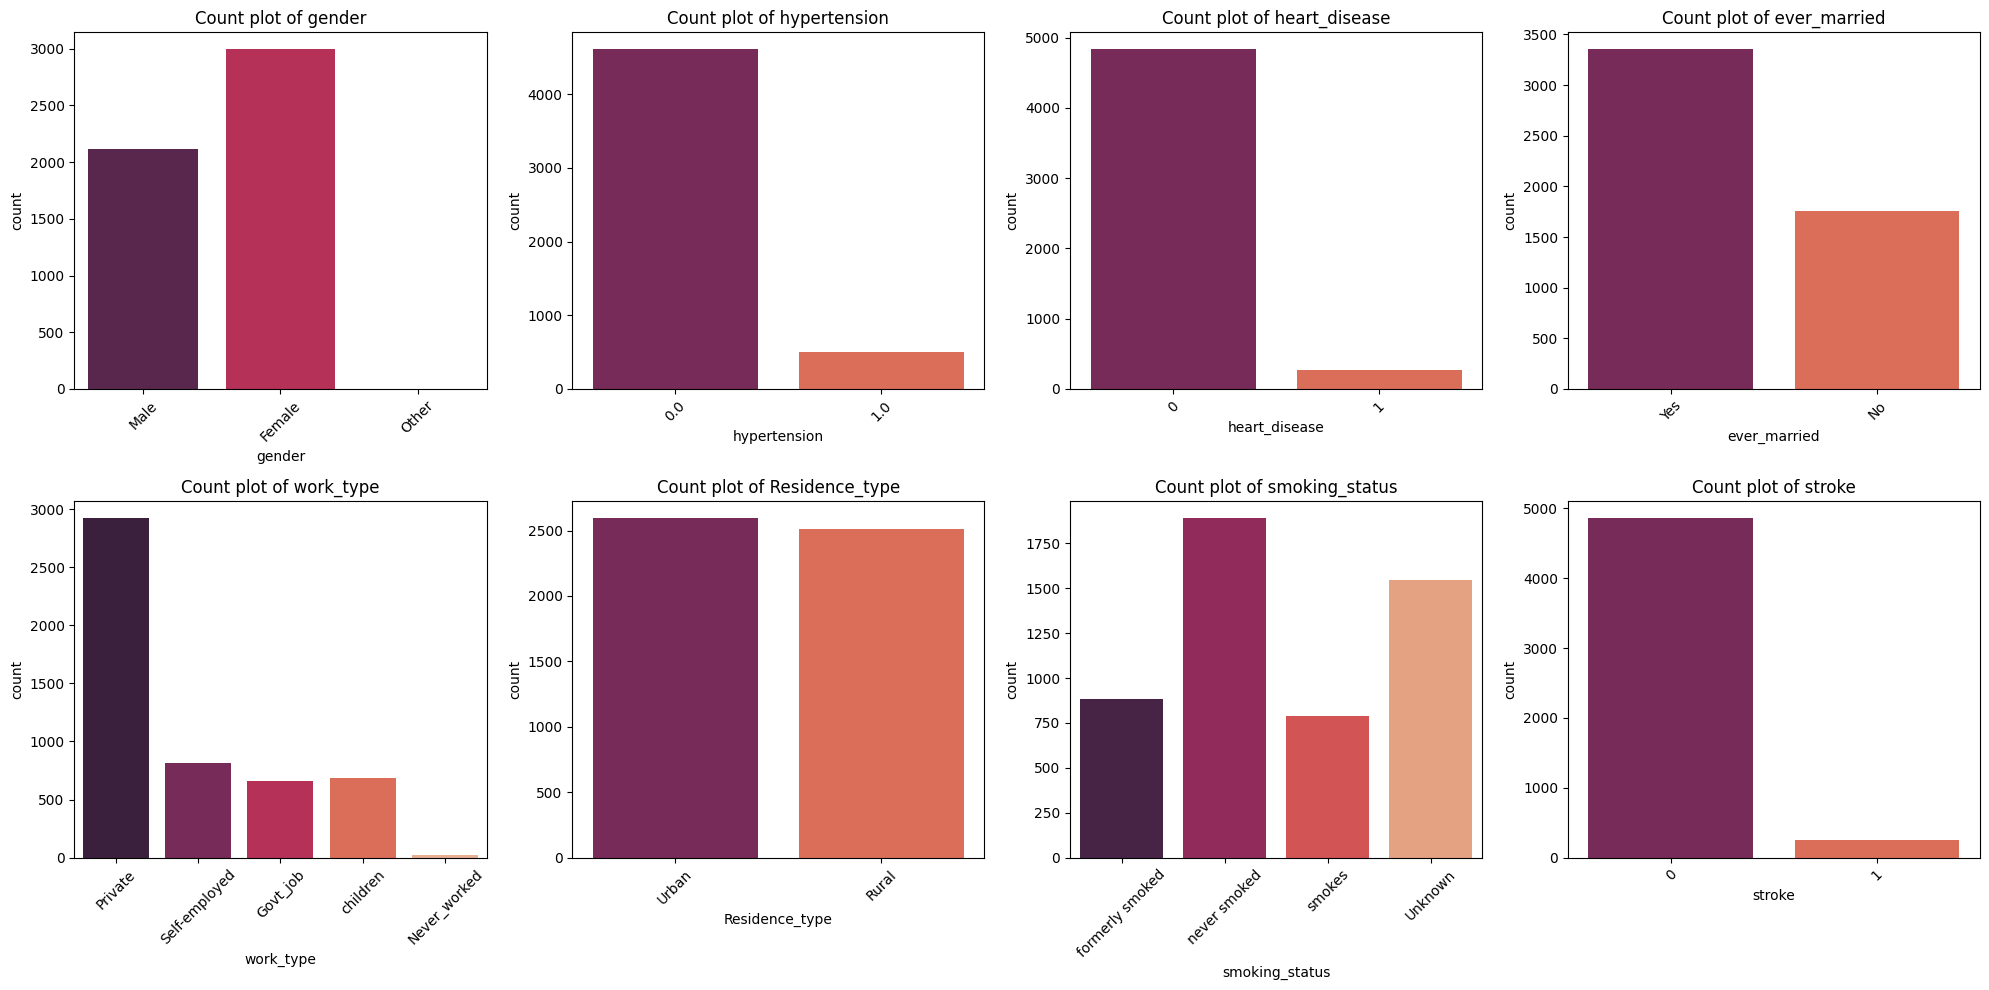

In [69]:
plt.figure(figsize=(20,10))
for i,col in enumerate(cat_col):
    plt.subplot(2,4,i+1)
    sns.countplot(data= df, x=col, palette='rocket')
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

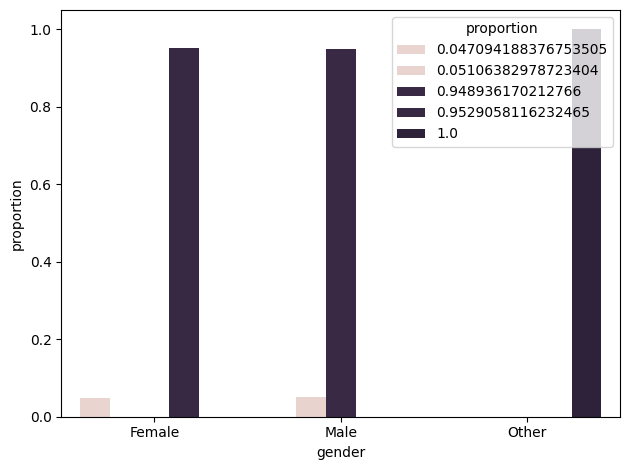

In [70]:
temp_df = df.groupby('gender',as_index = False)['stroke'].value_counts(normalize=True)
sns.barplot(x = 'gender',y ='proportion',data = temp_df, hue = 'proportion' , legend='auto')
plt.tight_layout()
plt.show()

In [71]:
temp_df = df.groupby('heart_disease',as_index = False)['stroke'].value_counts(normalize=True)
temp_df

heart_disease  stroke  proportion
0              0       0    0.958213
1              0       1    0.041787
2              1       0    0.829710
3              1       1    0.170290

In [72]:
temp_df = df.groupby('hypertension',as_index = False)['stroke'].value_counts(normalize=True)
temp_df

hypertension  stroke  proportion
0           0.0       0    0.960312
1           0.0       1    0.039688
2           1.0       0    0.867470
3           1.0       1    0.132530

In [73]:
temp_df = df.groupby('work_type',as_index = False)['hypertension'].value_counts(normalize=True)
temp_df['proportion'] = temp_df['proportion'] *100
temp_df

work_type  hypertension  proportion
0       Govt_job           0.0   88.888889
1       Govt_job           1.0   11.111111
2   Never_worked           0.0  100.000000
3        Private           0.0   90.386589
4        Private           1.0    9.613411
5  Self-employed           0.0   82.417582
6  Self-employed           1.0   17.582418
7       children           0.0  100.000000

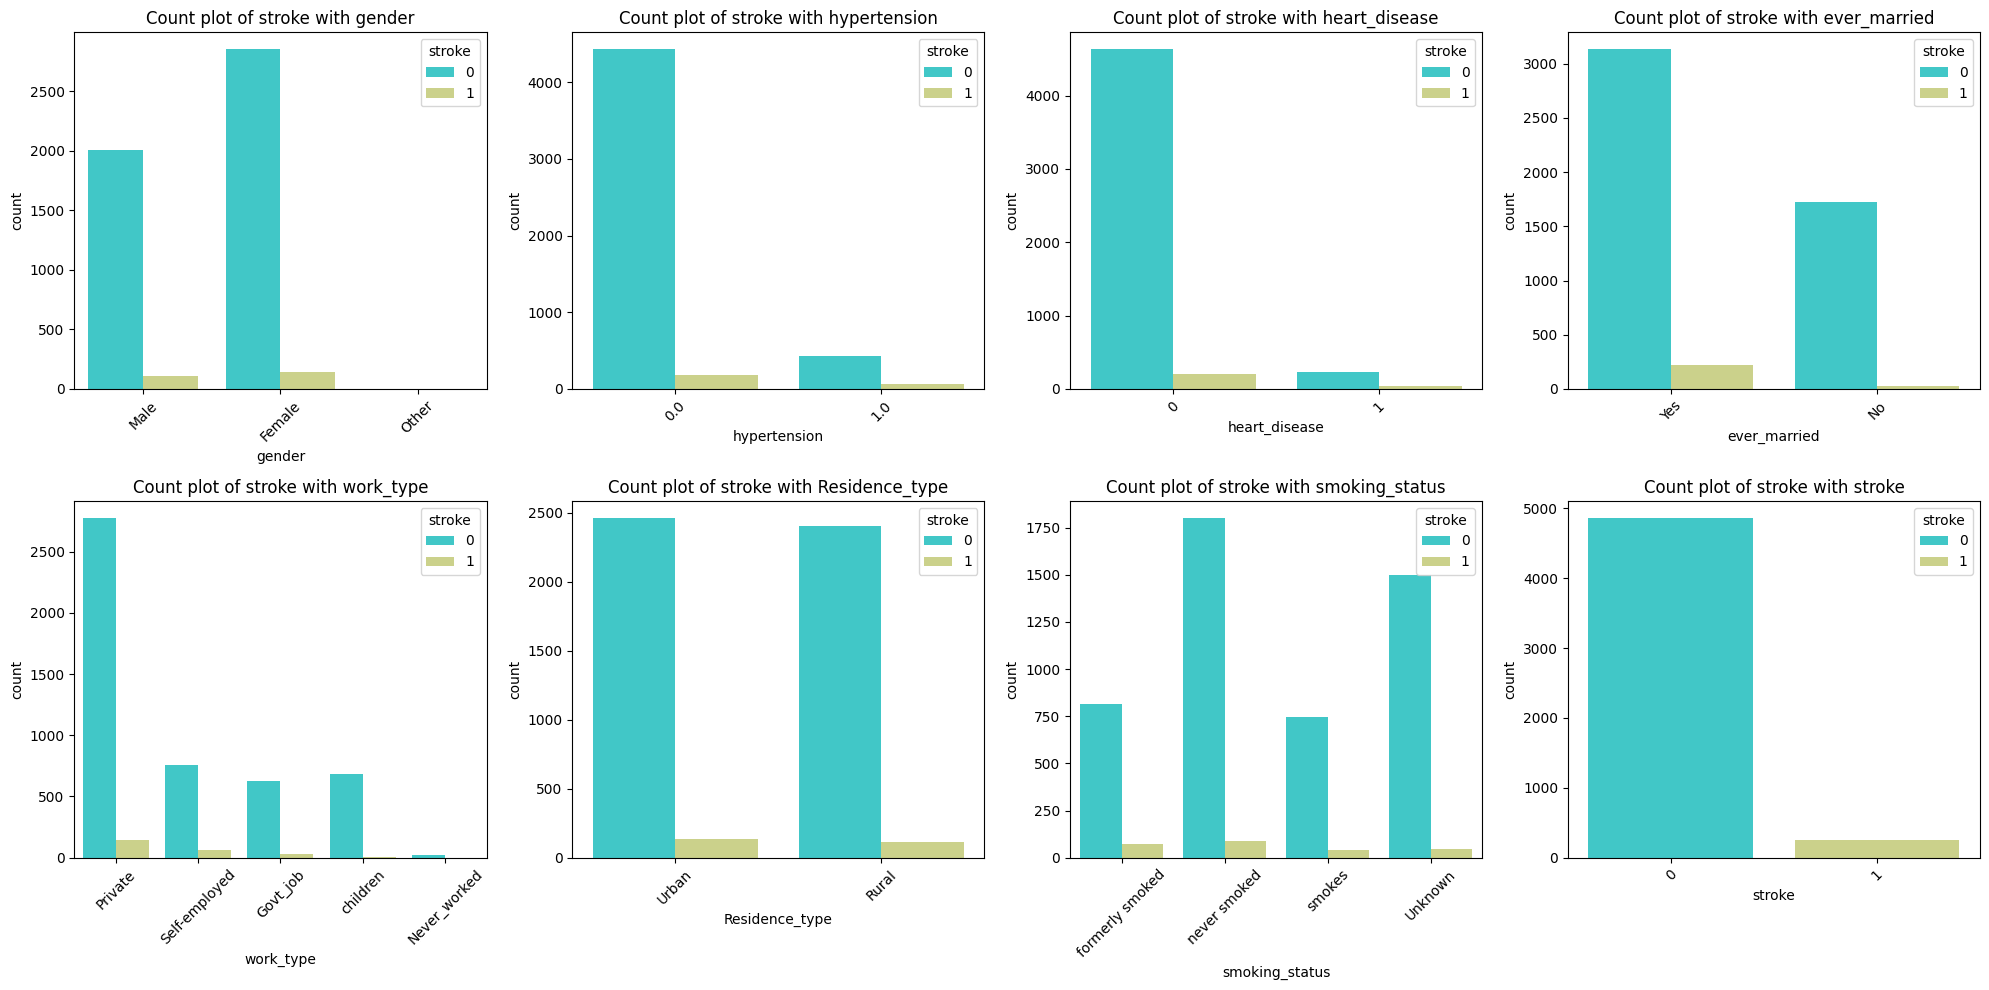

In [74]:
plt.figure(figsize=(20,10))
for i,col in enumerate(cat_col):
    plt.subplot(2,4,i+1)
    sns.countplot(data= df, x= col, palette='rainbow', hue='stroke')
    plt.title(f'Count plot of stroke with {col}')
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

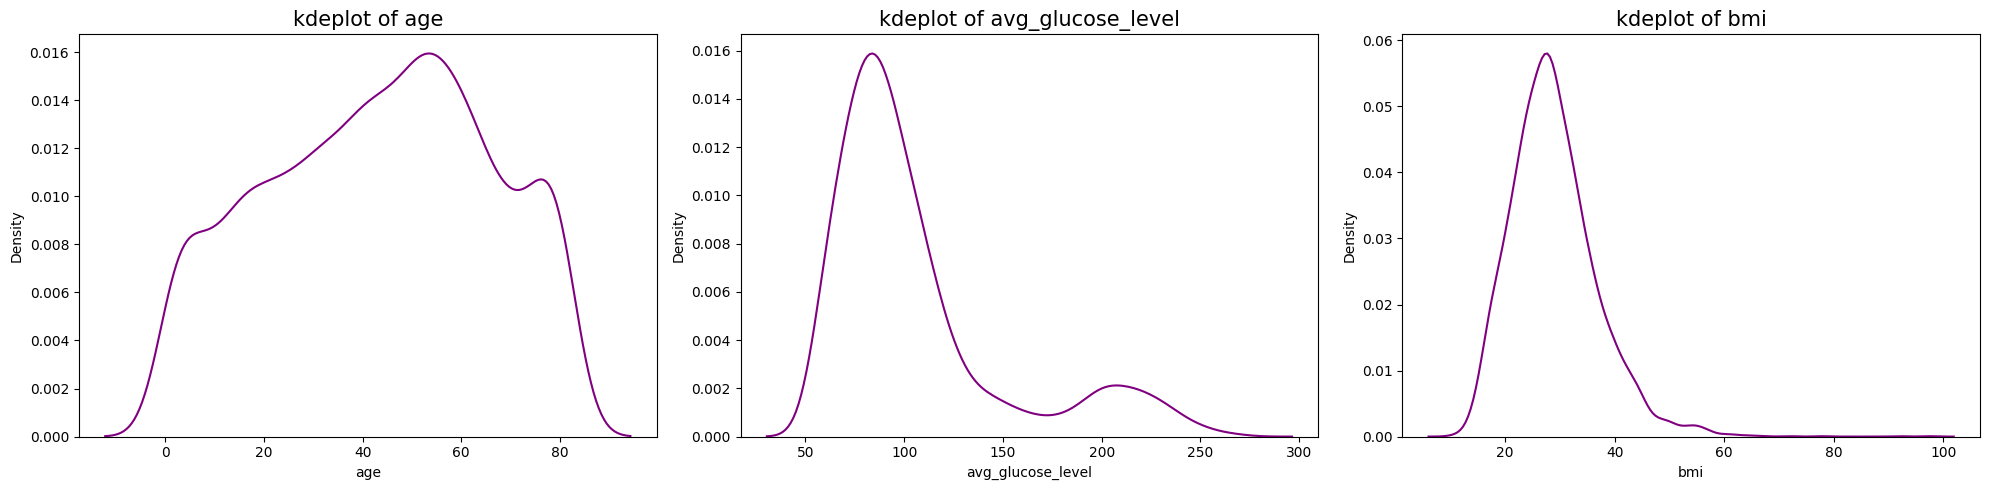

In [75]:
plt.figure(figsize=(20,5))
for i, col in enumerate(numeric_col[0:]):
    plt.subplot(1,3,i+1)
    sns.kdeplot(data= df, x= col, color='purple')
    plt.title(f'kdeplot of {col}', fontsize = 15)
plt.tight_layout()
plt.show()

<Axes: >

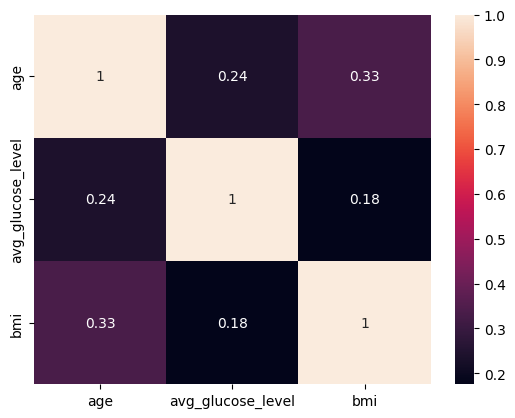

In [76]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

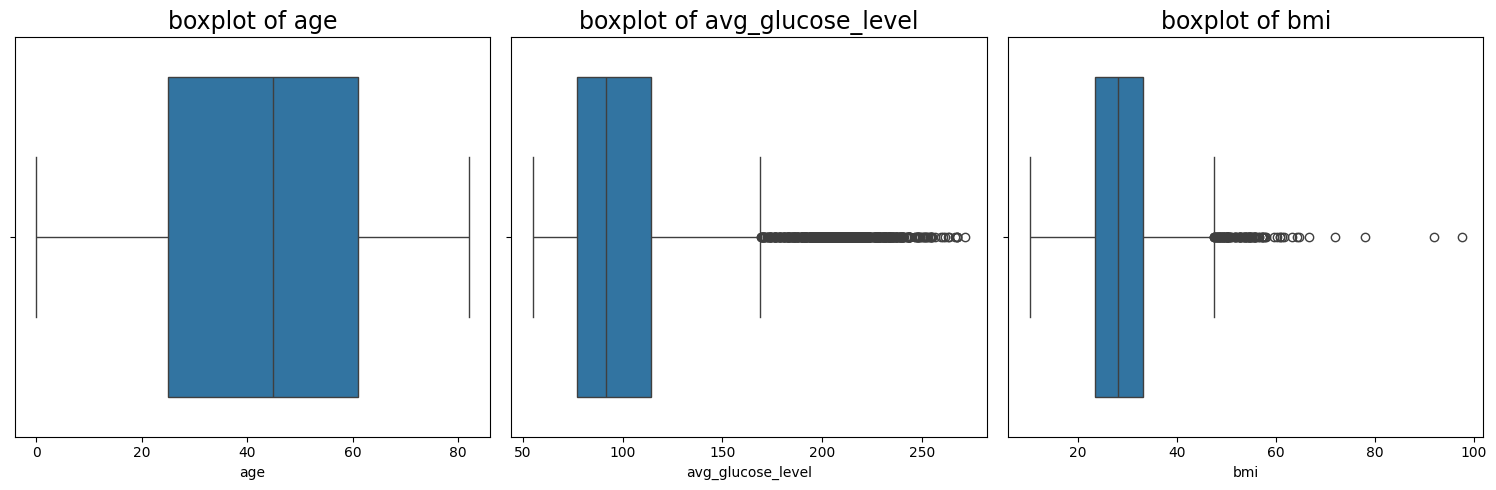

In [77]:
plt.figure(figsize=(20,5))
for i, col in enumerate(numeric_col):
    plt.subplot(1,4,i+1)
    sns.boxplot(data= df, x= col)
    plt.title(f'boxplot of {col}', fontsize = 17)
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

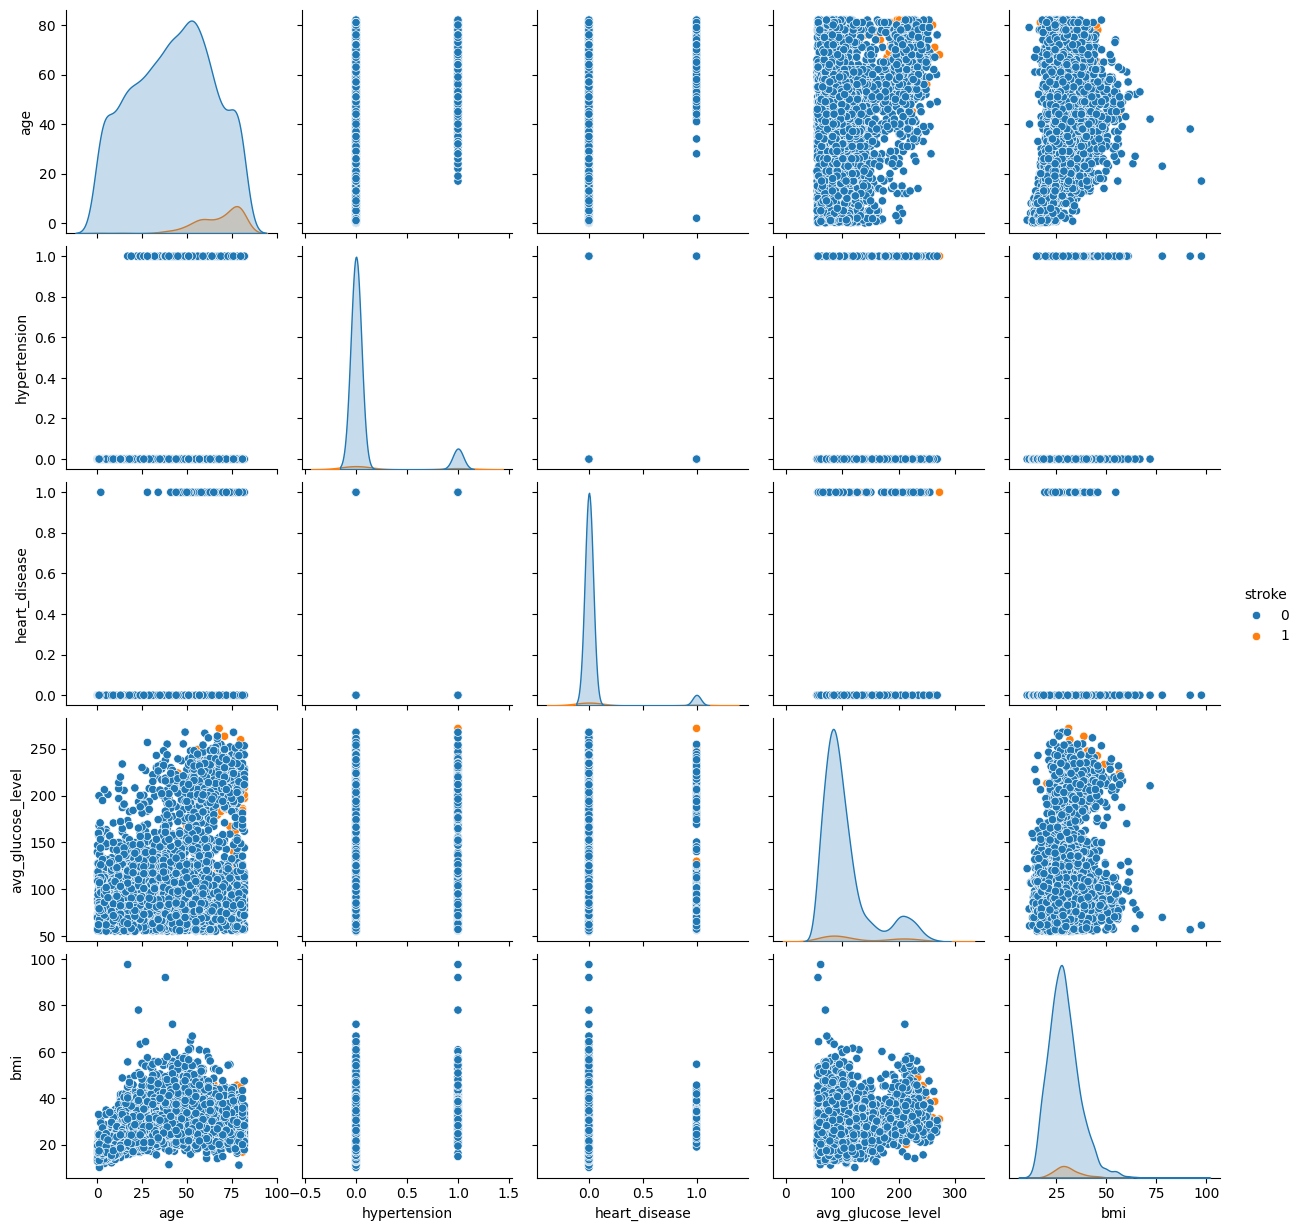

In [78]:
plt.figure(figsize=(20,10))
sns.pairplot(data= df,hue='stroke')
plt.show()

<Figure size 2000x1000 with 0 Axes>

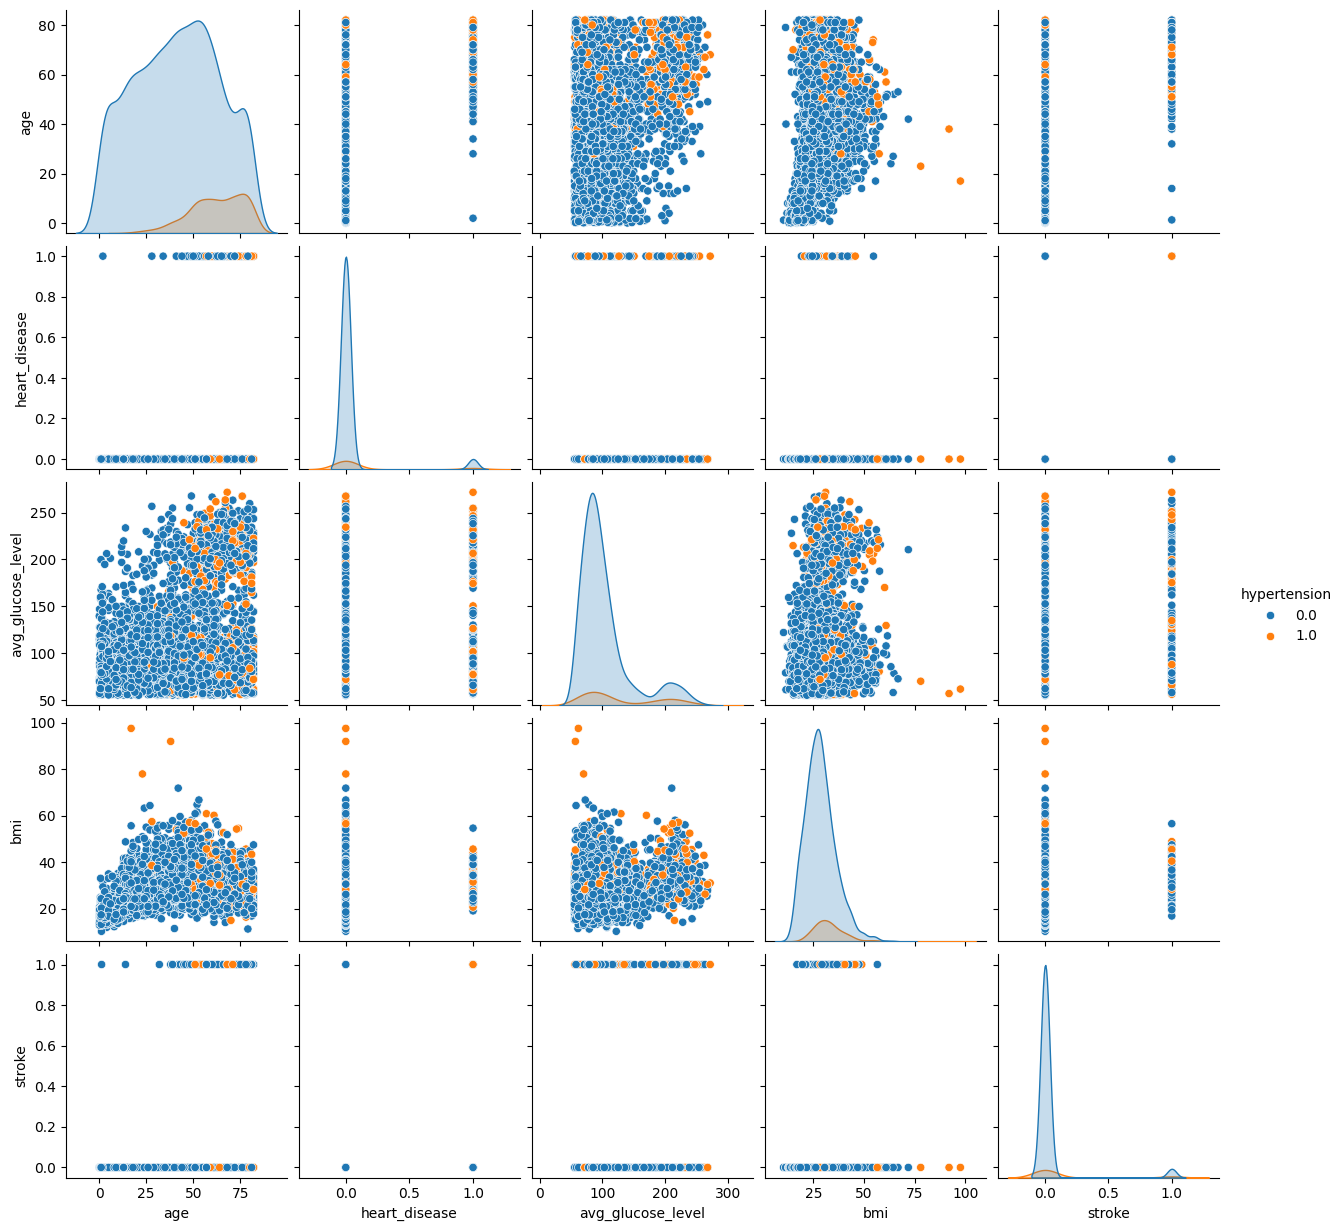

In [79]:
plt.figure(figsize=(20,10))
sns.pairplot(data= df,hue='hypertension')
plt.show()

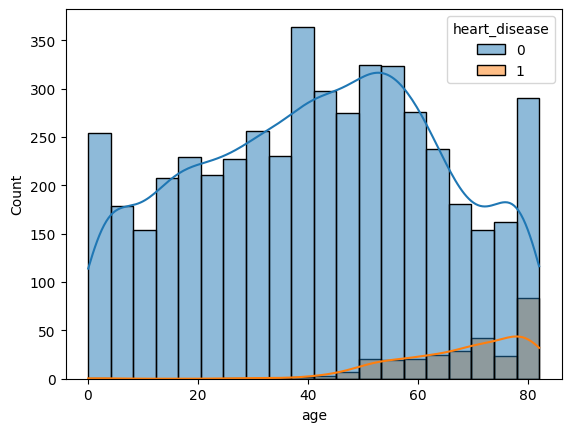

In [80]:
sns.histplot(data=df, x='age', hue='heart_disease', kde=True);

<Axes: xlabel='age', ylabel='Count'>

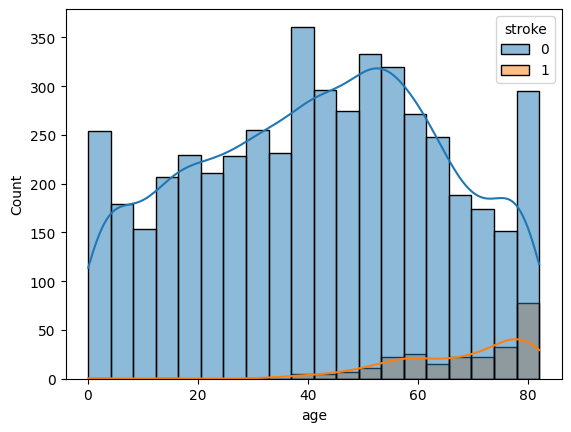

In [81]:
sns.histplot(data=df, x='age', hue='stroke', kde=True)

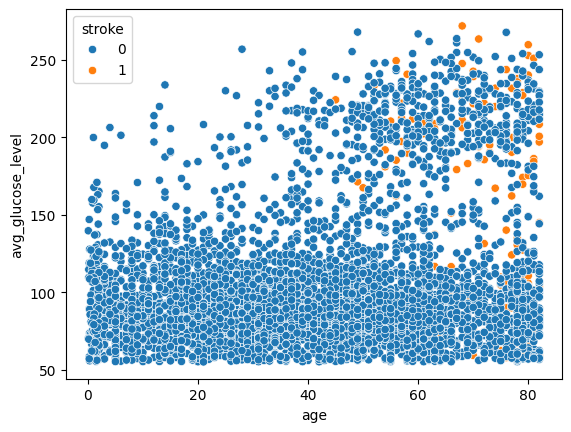

In [82]:
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df);

# Data preprocessing
### - First: We don't need the **id** Col because all the values are unique and won't give the model info
### - Second: We will remove the null values in **age**, **hypertention**, **work_type**
### - Third: We will replace the null values in the **smoking_status** Col to Unknown
### - Fourth: We will replace the null values in **bmi** with the (mean/median) of the col
### - Fifth: We will remove the Other value from the **gender** col because it wont affect the model learning


## Mentor advice -> because the data amount is small so we should not delete the null values but replace them instead

In [157]:
df.iloc[3116, 0] = 'Female'

df[binary_col] = df[binary_col].astype('float', errors='ignore')

cat_features = df.select_dtypes('object').columns
binary_cols = ['hypertension', 'heart_disease']
num_features = ['age', 'avg_glucose_level', 'bmi']

In [85]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke' ,axis= 1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .8, random_state=42)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [86]:
X_train.isna().sum()

gender                 0
age                    1
hypertension           1
heart_disease          0
ever_married           0
work_type              1
Residence_type         0
avg_glucose_level      0
bmi                  156
smoking_status         1
dtype: int64

In [87]:
X_test.isna().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             1
Residence_type        0
avg_glucose_level     0
bmi                  45
smoking_status        0
dtype: int64

In [88]:
X_train['age'].fillna(X_train['age'].median(), inplace = True)
X_train['hypertension'].fillna(X_train['hypertension'].median(), inplace = True)
X_train['smoking_status'].fillna('Unknown', inplace = True)
X_train['work_type'].fillna(X_train['work_type'].mode()[0], inplace = True)
X_train['bmi'].fillna(X_train['bmi'].median(), inplace = True)
X_train['work_type'].mode()


X_train.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

We should fill null values in test data with the values in the train to keep the data unleaked

In [89]:
# filling null in test
X_test['bmi'].fillna(X_train['bmi'].median(), inplace = True)
X_test['work_type'].fillna(X_train['work_type'].mode()[0], inplace = True)

X_test.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

# Logistic Regression

## Preprocessing

In [90]:
LR_X_train = X_train.copy()
LR_X_test = X_test.copy()

LR_y_train = y_train.copy()

In [91]:
# Imputing Outliers

for col in num_features:
    Q1 = LR_X_train[col].quantile(.25)
    Q3 = LR_X_train[col].quantile(.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    LR_X_train[col] = LR_X_train[col].apply(lambda x : lower_fence if x < lower_fence else upper_fence if x > upper_fence else x)

In [92]:
# Encoding -> one hot encoding
from sklearn.preprocessing import OneHotEncoder


for col in cat_features:

    ohe = OneHotEncoder()
    info_1hot_train = ohe.fit_transform(LR_X_train[[col]])
    df_1hot_train = pd.DataFrame(info_1hot_train.toarray(), columns= ohe.get_feature_names_out())

    info_1hot_test = ohe.transform(LR_X_test[[col]])
    df_1hot_test = pd.DataFrame(info_1hot_test.toarray(), columns= ohe.get_feature_names_out())



    LR_X_train = LR_X_train.merge(df_1hot_train, left_index=True, right_index=True).drop(columns=[col])
    LR_X_test = LR_X_test.merge(df_1hot_test, left_index=True, right_index=True).drop(columns=[col])



In [93]:
# Standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

LR_X_train[num_features] = scaler.fit_transform(LR_X_train[num_features])
LR_X_test[num_features] = scaler.transform(LR_X_test[num_features])


In [94]:
LR_X_train.head()

age  hypertension  heart_disease  avg_glucose_level       bmi  \
0  1.584729           0.0            0.0           0.331809 -0.032453   
1  0.830143           0.0            0.0          -0.386468  1.060512   
2 -0.989741           0.0            0.0          -1.237059  0.696191   
3 -0.545867           0.0            0.0          -1.054536  0.233782   
4 -0.545867           0.0            0.0          -1.233810 -1.237518   

   gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
0            0.0          1.0              0.0               1.0   
1            1.0          0.0              0.0               1.0   
2            1.0          0.0              1.0               0.0   
3            0.0          1.0              0.0               1.0   
4            1.0          0.0              1.0               0.0   

   work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                 0.0                     0.0                0.0   
1                 0.0                     0.0                1.0   
2                 0.0                     0.0                1.0   
3                 1.0                     0.0                0.0   
4                 0.0                     0.0                1.0   

   work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                      1.0                 0.0                   1.0   
1                      0.0                 0.0                   0.0   
2                      0.0                 0.0                   1.0   
3                      0.0                 0.0                   0.0   
4                      0.0                 0.0                   1.0   

   Residence_type_Urban  smoking_status_Unknown  \
0                   0.0                     0.0   
1                   1.0                     1.0   
2                   0.0                     0.0   
3                   1.0                     0.0   
4                   0.0                     0.0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                             1.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          1.0   
3                             1.0                          0.0   
4                             0.0                          1.0   

   smoking_status_smokes  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0

## OverSampling

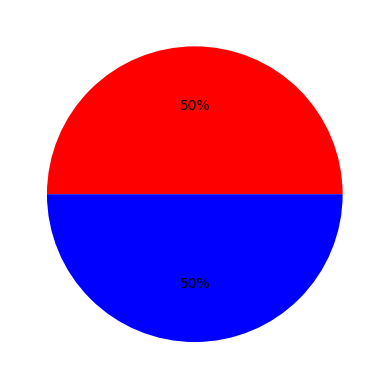

In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

LR_X_train, LR_y_train = smote.fit_resample(LR_X_train, LR_y_train)

plt.pie(LR_y_train.value_counts(normalize = True), autopct = '%1.0f%%', colors=['red', 'blue']);

In [96]:
# model
from sklearn.linear_model import LogisticRegression


LR_model = LogisticRegression()

LR_model.fit(LR_X_train, LR_y_train)

LogisticRegression()

In [97]:
LR_y_pred = LR_model.predict(LR_X_test)

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, LR_y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84       960
         1.0       0.17      0.82      0.28        62

    accuracy                           0.74      1022
   macro avg       0.58      0.78      0.56      1022
weighted avg       0.94      0.74      0.81      1022



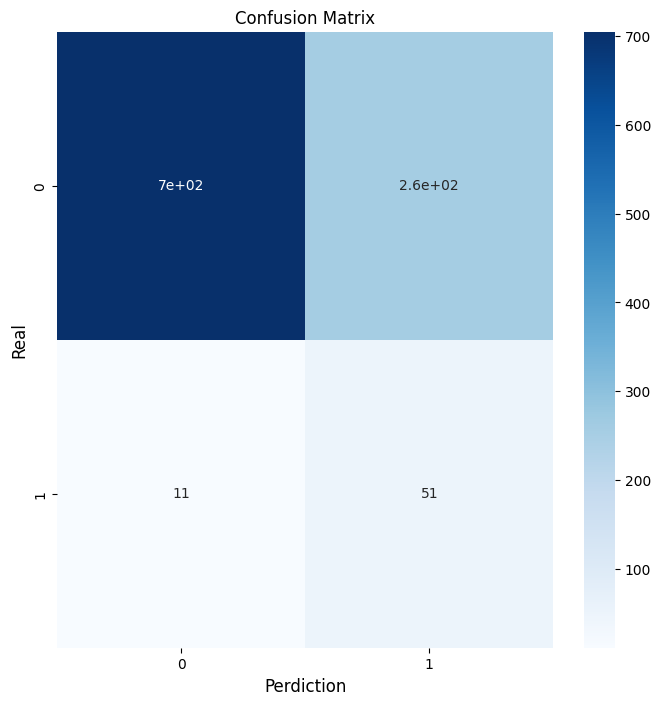

In [99]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, LR_y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Perdiction',fontsize = 12, color='black')
plt.ylabel('Real', fontsize = 12, color='black')
plt.title('Confusion Matrix')
plt.show()

In [100]:
cm

array([[705, 255],
       [ 11,  51]])

# KNN

In [101]:
# using the same preprocessing
KNN_X_train = LR_X_train.copy()
KNN_X_test = LR_X_test.copy()

KNN_y_train = LR_y_train.copy()

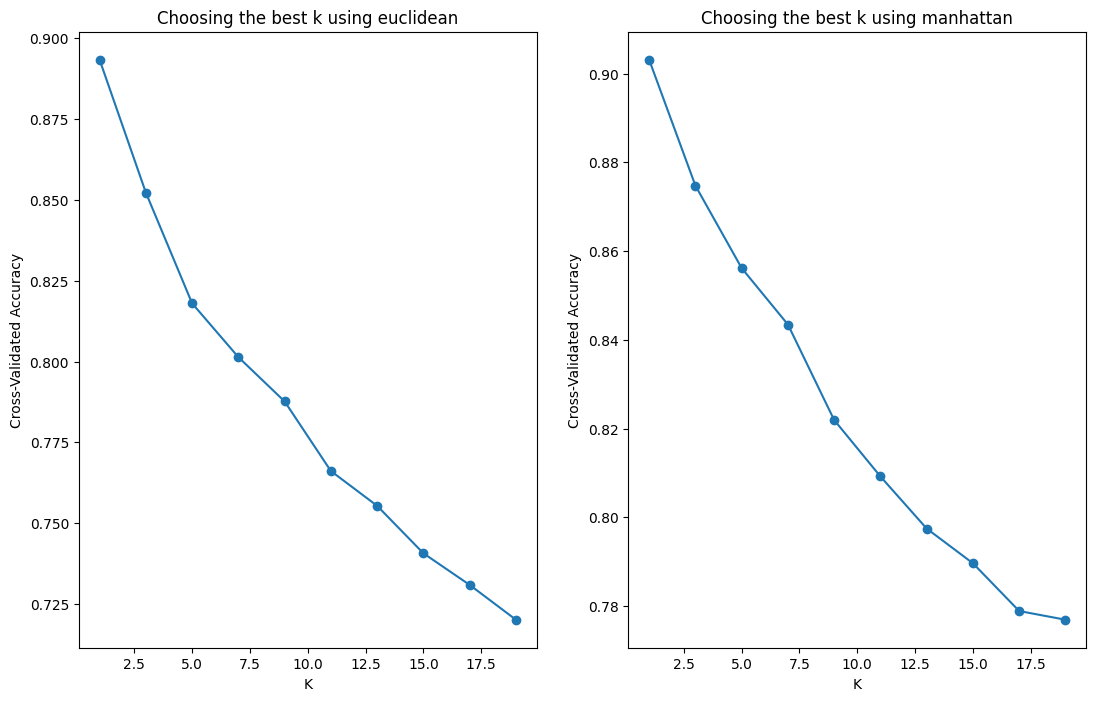

In [102]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 21 , 2)
scores = []
plt.figure(figsize=(13,8))


for k in k_range:
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(KNN_X_train, KNN_y_train)
    score = accuracy_score(y_test, KNN_model.predict(KNN_X_test))
    scores.append(score)

plt.subplot(1,2,1)
plt.plot(k_range, scores, marker='o')
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing the best k using euclidean')


scores = []

for k in k_range:
    KNN_model = KNeighborsClassifier(n_neighbors=k, metric= 'manhattan')
    KNN_model.fit(KNN_X_train, KNN_y_train)
    score = accuracy_score(y_test, KNN_model.predict(KNN_X_test))
    scores.append(score)
    
plt.subplot(1,2,2)
plt.plot(k_range, scores, marker='o')
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing the best k using manhattan')
plt.show()

In [103]:
best_k = 19

KNN_model = KNeighborsClassifier(n_neighbors=best_k)
KNN_model.fit(KNN_X_train, KNN_y_train)

KNN_y_pred = KNN_model.predict(KNN_X_test)

print(classification_report(y_test, KNN_y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83       960
         1.0       0.13      0.65      0.22        62

    accuracy                           0.72      1022
   macro avg       0.55      0.69      0.52      1022
weighted avg       0.92      0.72      0.79      1022



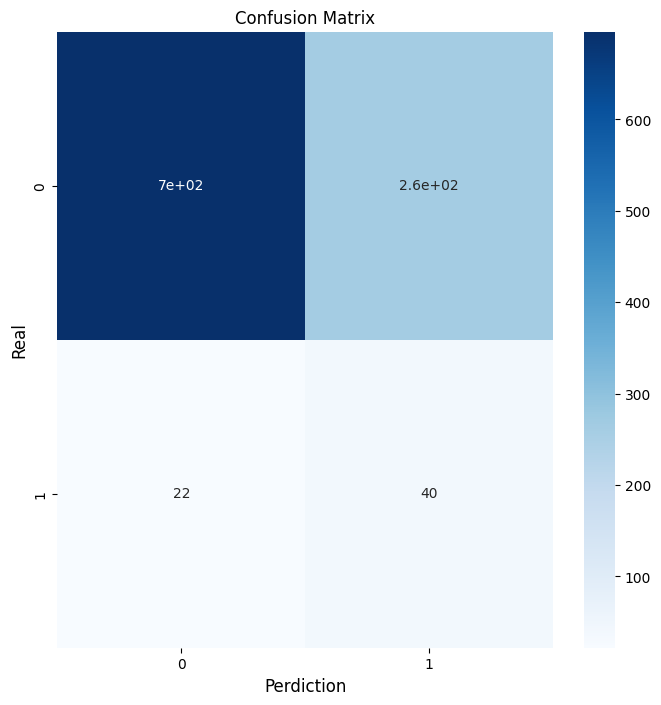

In [104]:
cm = confusion_matrix(y_test, KNN_y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Perdiction',fontsize = 12, color='black')
plt.ylabel('Real', fontsize = 12, color='black')
plt.title('Confusion Matrix')
plt.show()

In [105]:
cm

array([[696, 264],
       [ 22,  40]])

# Random forest

In [106]:
# same preprocessing
RF_X_train = KNN_X_train.copy()
RF_X_test = KNN_X_test.copy()

RF_y_train = KNN_y_train.copy()

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RF_model = RandomForestClassifier(random_state=42)

hyper_param = {
    'n_estimators':[50, 100, 200],
    'max_depth': [3, 10],
    'min_samples_split': [2,3,4],
    'max_features': [3,4]
}

grid_search = GridSearchCV(estimator= RF_model, param_grid= hyper_param, cv = 5, n_jobs= -1, scoring='recall')

In [108]:
grid_search.fit(RF_X_train , RF_y_train)

grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=3, min_samples_split=3,
                       n_estimators=50, random_state=42)

In [109]:
grid_search.best_params_


{'max_depth': 10,
 'max_features': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [110]:
RF_y_pred = grid_search.predict(RF_X_test)

print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       960
         1.0       0.21      0.39      0.27        62

    accuracy                           0.87      1022
   macro avg       0.58      0.65      0.60      1022
weighted avg       0.91      0.87      0.89      1022



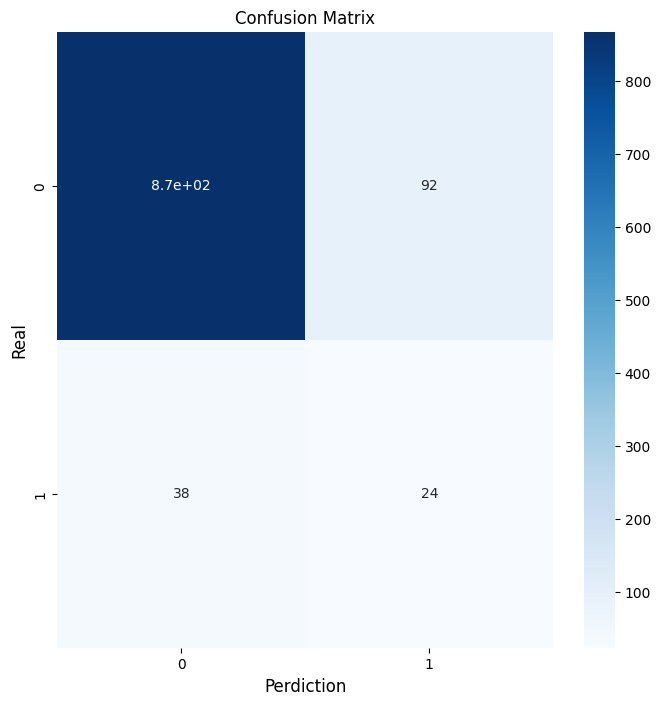

In [111]:
cm = confusion_matrix(y_test, RF_y_pred)

plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Perdiction',fontsize = 12, color='black')
plt.ylabel('Real', fontsize = 12, color='black')
plt.title('Confusion Matrix')
plt.show()

# XGBoost

In [112]:
# same preprocessing
XGBoost_X_train = RF_X_train.copy()
XGBoost_X_test = RF_X_test.copy()

XGBoost_y_train = RF_y_train.copy()

In [113]:
from xgboost import XGBClassifier
XGBoost_model = XGBClassifier(random_state=42)

hyper_param = {
    'n_estimators':[50, 100, 200],
    'max_depth': [None, 3, 10],
}


XGBoost_grid_search = GridSearchCV(estimator= XGBoost_model, param_grid= hyper_param, cv = 5, n_jobs= -1, scoring='recall')

In [114]:
XGBoost_grid_search.fit(XGBoost_X_train, XGBoost_y_train)

XGBoost_grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [115]:
XGBoost_grid_search.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [116]:
XGBoost_y_pred = XGBoost_grid_search.predict(XGBoost_X_test)

print(classification_report(y_test, XGBoost_y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       960
         1.0       0.19      0.08      0.11        62

    accuracy                           0.92      1022
   macro avg       0.56      0.53      0.54      1022
weighted avg       0.90      0.92      0.91      1022



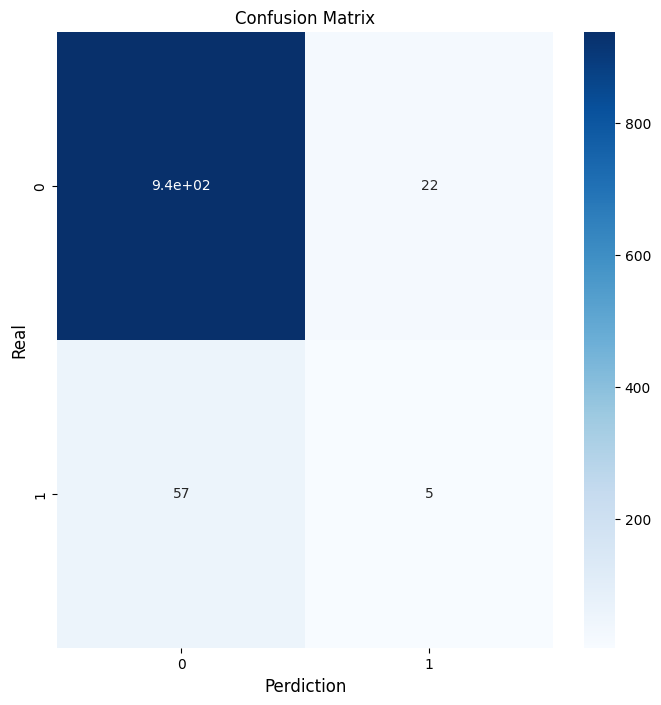

In [117]:
cm = confusion_matrix(y_test, XGBoost_y_pred)

plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Perdiction',fontsize = 12, color='black')
plt.ylabel('Real', fontsize = 12, color='black')
plt.title('Confusion Matrix')
plt.show()

# Trying Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline

def outlierHandling(X):
    X = pd.DataFrame(X, columns=num_features)
    for col in num_features:
        Q1 = X[col].quantile(.25)
        Q3 = X[col].quantile(.75)
        IQR = Q3 - Q1

        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        X[col] = X[col].apply(lambda x : lower_fence if x < lower_fence else upper_fence if x > upper_fence else x)
    return X


def imputingSmokingStatus(X):
    X = pd.DataFrame(X, columns=cat_features)
    X['smoking_status'].fillna('Unknown', inplace = True)
    return X

num_pipline = Pipeline([
    ('outliers_handling', FunctionTransformer(outlierHandling)),
    ('imputer', SimpleImputer(strategy='median')),
    ('stdScaler', StandardScaler())
])

cat_pipline = Pipeline([
    ('speific imputing', FunctionTransformer(imputingSmokingStatus)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipline, num_features),
    ('bin', 'passthrough', binary_cols),
    ('cat', cat_pipline, cat_features)
])


first_pipeline = ImbPipeline([
    ('preprocess', preprocessor),
    ('oversampling', SMOTE(sampling_strategy='auto', random_state=42)),
    ('model', LogisticRegression())
])

In [223]:
first_pipeline.fit(X= X_train, y= y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outliers_handling',
                                                                   FunctionTransformer(func=<function outlierHandling at 0x31b2a19e0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stdScaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('bin', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease']),
                                                 ('cat',
                                                  Pip...
                                                                   FunctionTransformer(func=<function imputingSmokingStatus at 0x31b2a16c0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))])),
                ('oversampling', SMOTE(random_state=42)),
                ('model', LogisticRegression())])

In [224]:
y_pred_pipline = first_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_pipline))

cm = confusion_matrix(y_test, y_pred_pipline)
cm

              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84       960
         1.0       0.17      0.81      0.28        62

    accuracy                           0.74      1022
   macro avg       0.58      0.77      0.56      1022
weighted avg       0.93      0.74      0.81      1022



array([[710, 250],
       [ 12,  50]])

In [121]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, make_scorer

my_scorer = make_scorer(recall_score, pos_label = 0)

dict = {'n_estimators' : [50,100,150,200],
        'max_depth' : [2,5,7],
        'min_samples_split': [2,4,5,6]}

rf = RandomForestClassifier()

grid_search_model = GridSearchCV(rf, param_grid=dict, cv=5, scoring= my_scorer, n_jobs=-1)
randomized_search_model = RandomizedSearchCV(rf, param_distributions=dict, n_iter=10 ,cv=5, scoring= my_scorer, n_jobs=-1)


first_pipline = ImbPipeline([
    ('preprocess', preprocessor),
    ('oversampling', SMOTE(sampling_strategy='auto', random_state=42)),
    ('model', grid_search_model)
])

second_pipline = ImbPipeline([
    ('preprocess', preprocessor),
    ('oversampling', SMOTE(sampling_strategy='auto', random_state=42)),
    ('model', randomized_search_model)
])

In [122]:
first_pipline.fit(X_train, y_train)
second_pipline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outliers_handling',
                                                                   FunctionTransformer(func=<function outlierHandling at 0x3169eaac0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stdScaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('speific '
                                                                   'imputing',
                                                                   FunctionTransformer(f...
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))])),
                ('oversampling', SMOTE(random_state=42)),
                ('model',
                 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                                    n_jobs=-1,
                                    param_distributions={'max_depth': [2, 5, 7],
                                                         'min_samples_split': [2,
                                                                               4,
                                                                               5,
                                                                               6],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200]},
                                    scoring=make_scorer(recall_score, response_method='predict', pos_label=0)))])

In [123]:
W3W3 = first_pipline.predict(X_test)
W2W2 = second_pipline.predict(X_test)

In [124]:
print(classification_report(y_test, W3W3))

cm = confusion_matrix(y_test, W3W3)
cm

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       960
         1.0       0.17      0.61      0.27        62

    accuracy                           0.80      1022
   macro avg       0.57      0.71      0.58      1022
weighted avg       0.92      0.80      0.85      1022



array([[780, 180],
       [ 24,  38]])

In [125]:
print(classification_report(y_test, W2W2))

cm = confusion_matrix(y_test, W2W2)
cm

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       960
         1.0       0.17      0.61      0.26        62

    accuracy                           0.79      1022
   macro avg       0.57      0.71      0.57      1022
weighted avg       0.92      0.79      0.84      1022



array([[768, 192],
       [ 24,  38]])

# saving model

In [204]:
import joblib

joblib.dump(first_pipeline, 'LR_pipline_model.pkl')

['LR_pipline_model.pkl']

# Learning SHAP

In [127]:
import shap
shap.initjs()

In [194]:
preprocessor = first_pipeline['preprocess']
cat = preprocessor['cat']
ohe = cat['encoder']
preprocessed_cat = ohe.get_feature_names_out().tolist()

num = preprocessor['num']['imputer']
preprocessed_num = num.get_feature_names_out().tolist()

bin = preprocessor['bin']
preprocessed_bin = bin.get_feature_names_out().tolist()

X_transformed = preprocessor.transform(X_test)

feature_names = preprocessed_num + preprocessed_bin + preprocessed_cat

X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

In [208]:
X_ = preprocessor.transform(X)
explainer = shap.LinearExplainer(first_pipeline['model'], X_)
shap_values = explainer(X_transformed_df)

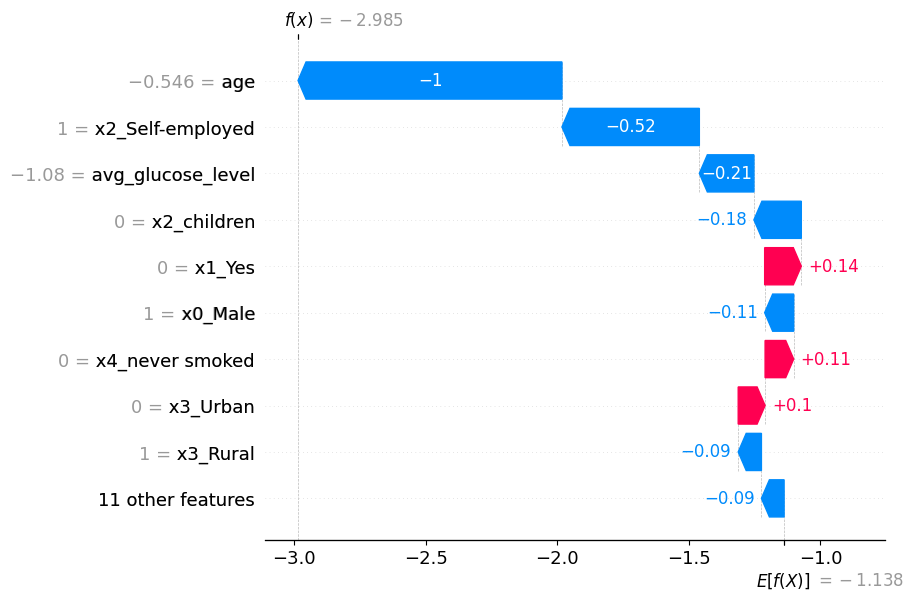

In [209]:
shap.plots.waterfall(shap_values[0])

In [210]:
shap.plots.force(shap_values)

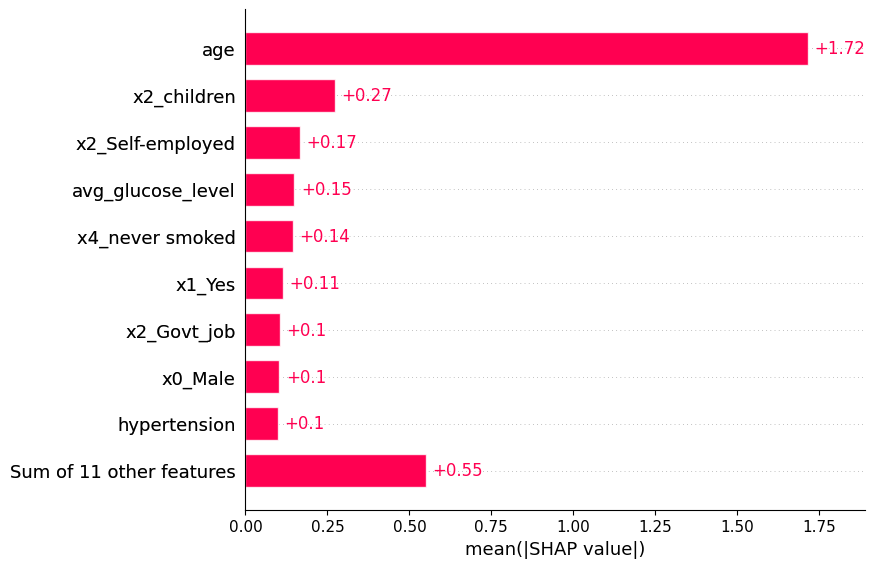

In [211]:
shap.plots.bar(shap_values)

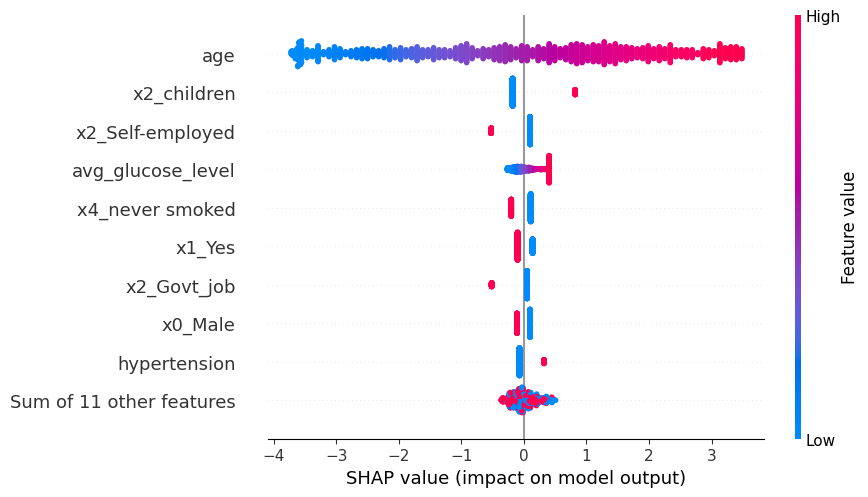

In [212]:
shap.plots.beeswarm(shap_values)

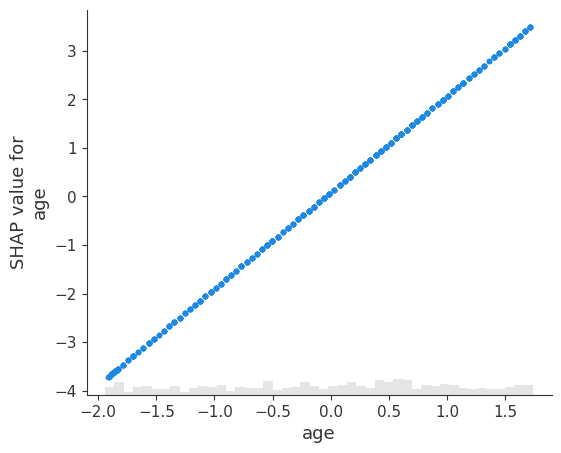

In [213]:
shap.plots.scatter(shap_values[:, "age"])